In [1]:
import torch
import torchvision
from torchvision import transforms , datasets
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("",train=True,download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))


In [3]:
train_set=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
test_set=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [4]:
import torch.nn as nn
import torch.nn.functional as F 

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        
        return F.log_softmax(x,dim=1)
        
        
        
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim
#                    hon ktabna hek laan for ex bel transfer learning iza
#                    ekhdin pretrained model w bdna nestaamlo to predict
#                    shi tene fina ma naadil b awal kam layer laano ha 
#                    ykouno ktir mneh bas lezim naadil ekhir kam layer
#                    ta yaatuna  l output l bdna yeha 
#                    ***************
optimizer=optim.Adam(net.parameters(),lr=0.001)
EPOCHS=3
for epoch in range(EPOCHS):
    for data in train_set:
        X,y=data
        net.zero_grad()#when we are training our model we set some unnecessary info = 0 to finsih faster
        output=net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)#laano to calculate the loss , our vector isnt a one hot vector(ex:[0,0,1])
        loss.backward()#In fitting a neural network, backpropagation computes the gradient of the loss function with
        #respect to the weights of the network for a single input–output example, and does so efficiently,
        # unlike a naive direct computation of the gradient with respect to each weight individually.
        optimizer.step()#this adjust the weights
    print(loss)

tensor(0.1721, grad_fn=<NllLossBackward0>)
tensor(0.0748, grad_fn=<NllLossBackward0>)
tensor(0.0520, grad_fn=<NllLossBackward0>)


In [ ]:

plt.imshow(X[0].view(28,28))
plt.show()

In [4]:
correct = 0 
total = 0 
with torch.no_grad():
    for data in train_set:
        X,y=data
        output=net(X.view(-1,784))
        for idx , i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy : ", round(correct/total,3))
    

NameError: name 'train_set' is not defined

In [13]:
print(torch.argmax(net(X[0].view(-1,784))))

tensor(4)


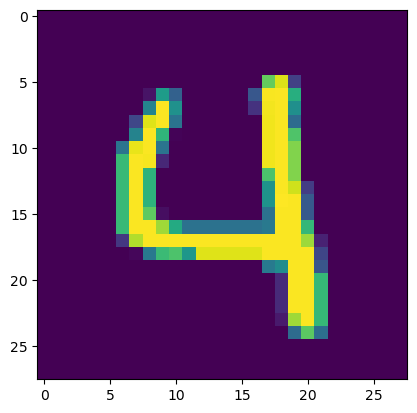

In [14]:
plt.imshow(X[0].view(28,28))

In [17]:
print(torch.argmax(net(X[4].view(-1,784))))

tensor(7)


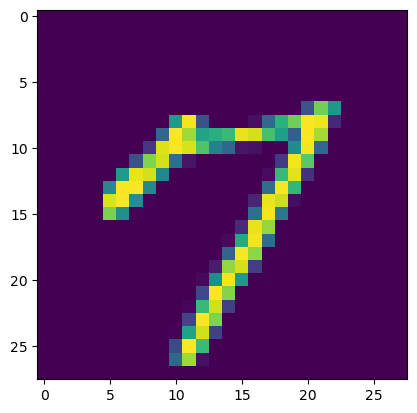

In [18]:
plt.imshow(X[4].view(28,28))